In [1]:
import numpy as np
import pandas as pd
import time

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error, r2_score

import tensorflow as tf 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM, GRU, Dropout, Bidirectional

import warnings
warnings.filterwarnings('ignore')

In [2]:
import ShapTimeRNN
from ShapTimeRNN import supertime, ShapleyValues, TimeImportance, TimeHeatmap, trans, supertime_add

In [3]:
data = pd.read_csv('D:/Papers/paper_code/new/Data/Processed/Tesla_data.csv')
data.head()

,Date,Close,lag_O,lag_H,lag_L,lag_C,lag_A,Year,Month,Day,Weekday
0,2010-07-02,0.000554,0.000465,0.001350,0.000422,0.001319,0.001319,0.0,0.545455,0.033333,1.00
1,2010-07-06,0.000051,0.001568,0.002224,0.001371,0.001309,0.001309,0.0,0.545455,0.166667,0.25
2,2010-07-07,0.000000,0.001439,0.001498,0.000871,0.001004,0.001004,0.0,0.545455,0.200000,0.50
3,2010-07-08,0.000271,0.001114,0.001043,0.000614,0.000554,0.000554,0.0,0.545455,0.233333,0.75
4,2010-07-09,0.000261,0.000627,0.000543,0.000140,0.000051,0.000051,0.0,0.545455,0.266667,1.00


In [4]:
train = data[:-92]
test = data[-92:]
print(train.shape)
print(test.shape)

(3048, 11)
(92, 11)


In [5]:
x_train = train.drop(columns = {'Date','Close'}, axis = 1)
y_train = train.loc[:, ['Close']]

x_test = test.drop(columns = {'Date','Close'}, axis = 1)
y_test = test.loc[:, ['Close']]

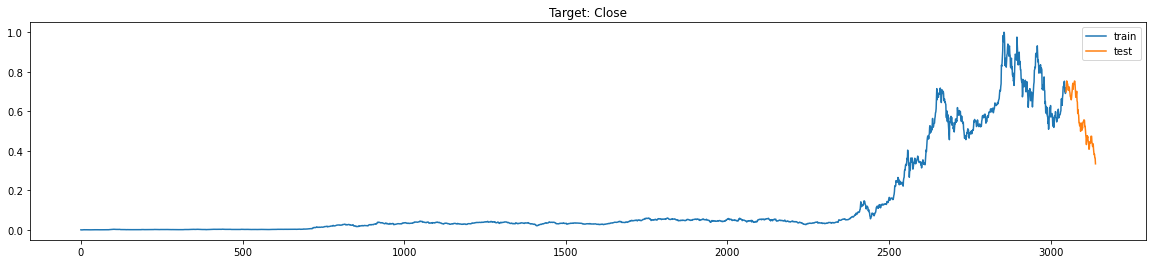

In [6]:
sns.reset_orig()
plt.figure(figsize = (20,4))
plt.title('Target: Close')
plt.plot(train['Close'], label = 'train')
plt.plot(test['Close'], label = 'test')

plt.legend()
plt.show()

In [7]:
x_train_sca = x_train.values[:].reshape(x_train.shape[0], 1, x_train.shape[1])
x_test_sca = x_test.values[:].reshape(x_test.shape[0], 1, x_test.shape[1])

# RNN

In [8]:
model_rnn = tf.keras.Sequential([
        SimpleRNN(100, return_sequences=True,activation='relu'), 
        Dropout(0.1), 
        SimpleRNN(100,return_sequences=False),
        Dropout(0.2), 
        Dense(1) ])

model_rnn.compile(loss='mse', optimizer='adam') 
    
history = model_rnn.fit(x_train_sca, y_train, batch_size=64, epochs=100)

Epoch 1/100
48/48 [==============================] - 1s 1ms/step - loss: 0.0330
Epoch 2/100
48/48 [==============================] - 0s 1ms/step - loss: 0.0069
Epoch 3/100
48/48 [==============================] - 0s 1ms/step - loss: 0.0048
Epoch 4/100
48/48 [==============================] - 0s 1ms/step - loss: 0.0033
Epoch 5/100
48/48 [==============================] - 0s 1ms/step - loss: 0.0027
Epoch 6/100
48/48 [==============================] - 0s 1ms/step - loss: 0.0025
Epoch 7/100
48/48 [==============================] - 0s 1ms/step - loss: 0.0023
Epoch 8/100
48/48 [==============================] - 0s 1ms/step - loss: 0.0020
Epoch 9/100
48/48 [==============================] - 0s 1ms/step - loss: 0.0020
Epoch 10/100
48/48 [==============================] - 0s 1ms/step - loss: 0.0019
Epoch 11/100
48/48 [==============================] - 0s 1ms/step - loss: 0.0017
Epoch 12/100
48/48 [==============================] - 0s 1ms/step - loss: 0.0016
Epoch 13/100
48/48 [=================

In [9]:
prediction_rnn = model_rnn.predict(x_test_sca)

3/3 [==============================] - 0s 1ms/step


In [10]:
r2 = r2_score(prediction_rnn, y_test)
mse = mean_squared_error(prediction_rnn, y_test)
print(r2)
print(mse)

0.8133762879864207
0.0021989388067506373


In [21]:
model_rnn.save('model_rnn.h5')

In [11]:
Tn= 11
interp_x= x_train_sca
model = model_rnn

ShapTime_rnn = ShapleyValues(model, interp_x, Tn)

35/35 [==============================] - 0s 593us/step


61/61 [==============================] - 0s 559us/step


44/44 [==============================] - 0s 573us/step


44/44 [==============================] - 0s 568us/step


70/70 [==============================] - 0s 578us/step


26/26 [==============================] - 0s 564us/step


52/52 [==============================] - 0s 606us/step


52/52 [==============================] - 0s 567us/step


52/52 [==============================] - 0s 611us/step


52/52 [==============================] - 0s 567us/step


78/78 [==============================] - 0s 609us/step


44/44 [==============================] - 0s 673us/step


96/96 [==============================] - 0s 619us/step


In [12]:
ShapTime_rnn

[array([-0.03632922], dtype=float32),
 array([-0.03620268], dtype=float32),
 array([-0.03407372], dtype=float32),
 array([-0.02806865], dtype=float32),
 array([-0.02728591], dtype=float32),
 array([-0.02811285], dtype=float32),
 array([-0.02326155], dtype=float32),
 array([-0.02366988], dtype=float32),
 array([-0.01814796], dtype=float32),
 array([0.08932063], dtype=float32),
 array([0.16587096], dtype=float32)]

In [13]:
time_columns =  ['t0', 't1', 't2', 't3', 't4', 't5', 't6', 't7', 't8', 't9', 't10']

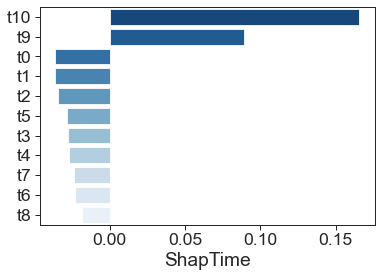

In [14]:
TimeImportance(Tn, trans(ShapTime_rnn), time_columns)

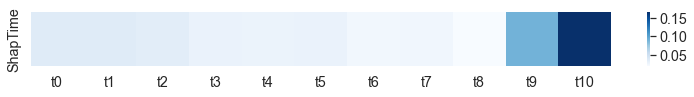

In [15]:
TimeHeatmap(Tn, trans(ShapTime_rnn), time_columns)

In [16]:
for k in range(Tn):
    exec(f't{k} = supertime_add(Tn, train)[k]')

In [17]:
check_replist = [t0, t1, t2, t3, t4, t5, t6, t7, t10, t9, t10]

In [19]:
#check
check = pd.concat(check_replist, axis = 0)
x_check = check.drop(columns = {'Date','Close'}, axis = 1)
y_check = check.loc[:, ['Close']]
x_check_sca = x_check.values[:].reshape(x_check.shape[0], 1, x_check.shape[1])


model_check = tf.keras.Sequential([
        SimpleRNN(100, return_sequences=True,activation='relu'), 
        Dropout(0.1), 
        SimpleRNN(100,return_sequences=False),
        Dropout(0.2), 
        Dense(1) ])

model_check.compile(loss='mse', optimizer='adam') 
    
history = model_check.fit(x_check_sca, y_check, batch_size=64, epochs=100)

Epoch 1/100
48/48 [==============================] - 1s 2ms/step - loss: 0.0226
Epoch 2/100
48/48 [==============================] - 0s 2ms/step - loss: 0.0069
Epoch 3/100
48/48 [==============================] - 0s 2ms/step - loss: 0.0050
Epoch 4/100
48/48 [==============================] - 0s 2ms/step - loss: 0.0039
Epoch 5/100
48/48 [==============================] - 0s 2ms/step - loss: 0.0034
Epoch 6/100
48/48 [==============================] - 0s 2ms/step - loss: 0.0028
Epoch 7/100
48/48 [==============================] - 0s 2ms/step - loss: 0.0027
Epoch 8/100
48/48 [==============================] - 0s 2ms/step - loss: 0.0023
Epoch 9/100
48/48 [==============================] - 0s 2ms/step - loss: 0.0023
Epoch 10/100
48/48 [==============================] - 0s 2ms/step - loss: 0.0022
Epoch 11/100
48/48 [==============================] - 0s 2ms/step - loss: 0.0020
Epoch 12/100
48/48 [==============================] - 0s 2ms/step - loss: 0.0021
Epoch 13/100
48/48 [=================

In [20]:
pred_check = model_check.predict(x_test_sca)
r2_check = r2_score(pred_check, y_test)
mse_check = mean_squared_error(pred_check, y_test)

print(r2_check, 'Degree of Improvement: {:.2%}'.format((r2_check-r2)/abs(r2)))
print(mse_check, 'Degree of Improvement: {:.2%}'.format((mse-mse_check)/mse))

3/3 [==============================] - 0s 2ms/step
0.8385790411363034 Degree of Improvement: 3.10%
0.002030008436505508 Degree of Improvement: 7.68%


In [22]:
model_check.save('model_(rnn).h5')

# LSTM

In [23]:
model_lstm = tf.keras.Sequential([
        LSTM(100, return_sequences=True,activation='relu'), 
        Dropout(0.1), 
        LSTM(100,return_sequences=False),
        Dropout(0.2), 
        Dense(1) ])

model_lstm.compile(loss='mse', optimizer='adam') 
    
history = model_lstm.fit(x_train_sca, y_train, batch_size=64, epochs=100)

Epoch 1/100
48/48 [==============================] - 2s 5ms/step - loss: 0.0303
Epoch 2/100
48/48 [==============================] - 0s 5ms/step - loss: 0.0016
Epoch 3/100
48/48 [==============================] - 0s 5ms/step - loss: 9.3314e-04
Epoch 4/100
48/48 [==============================] - 0s 5ms/step - loss: 9.0045e-04
Epoch 5/100
48/48 [==============================] - 0s 5ms/step - loss: 8.5514e-04
Epoch 6/100
48/48 [==============================] - 0s 5ms/step - loss: 8.0994e-04
Epoch 7/100
48/48 [==============================] - 0s 6ms/step - loss: 8.0933e-04
Epoch 8/100
48/48 [==============================] - 0s 6ms/step - loss: 7.6646e-04
Epoch 9/100
48/48 [==============================] - 0s 6ms/step - loss: 7.7266e-04
Epoch 10/100
48/48 [==============================] - 0s 5ms/step - loss: 7.6028e-04
Epoch 11/100
48/48 [==============================] - 0s 5ms/step - loss: 7.5672e-04
Epoch 12/100
48/48 [==============================] - 0s 6ms/step - loss: 7.1676e-

In [24]:
prediction_lstm = model_lstm.predict(x_test_sca)

3/3 [==============================] - 0s 1ms/step


In [25]:
r2 = r2_score(prediction_lstm, y_test)
mse = mean_squared_error(prediction_lstm, y_test)
print(r2)
print(mse)

0.8586710055504045
0.0017668888001670865


In [35]:
model_lstm.save('model_lstm.h5')

In [26]:
Tn= 11
interp_x= x_train_sca
model = model_lstm

ShapTime_lstm = ShapleyValues(model, interp_x, Tn)

35/35 [==============================] - 0s 888us/step


70/70 [==============================] - 0s 870us/step


52/52 [==============================] - 0s 880us/step


35/35 [==============================] - 0s 997us/step


26/26 [==============================] - 0s 1ms/step


52/52 [==============================] - 0s 1ms/step


44/44 [==============================] - 0s 1ms/step


96/96 [==============================] - 0s 1ms/step


In [27]:
ShapTime_lstm

[array([-0.03746519], dtype=float32),
 array([-0.03697075], dtype=float32),
 array([-0.03463018], dtype=float32),
 array([-0.02834439], dtype=float32),
 array([-0.02716425], dtype=float32),
 array([-0.027536], dtype=float32),
 array([-0.02247793], dtype=float32),
 array([-0.02256487], dtype=float32),
 array([-0.01726764], dtype=float32),
 array([0.0897454], dtype=float32),
 array([0.16471814], dtype=float32)]

In [28]:
time_columns =  ['t0', 't1', 't2', 't3', 't4', 't5', 't6', 't7', 't8', 't9', 't10']

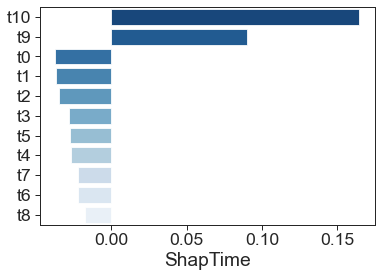

In [29]:
TimeImportance(Tn, trans(ShapTime_lstm), time_columns)

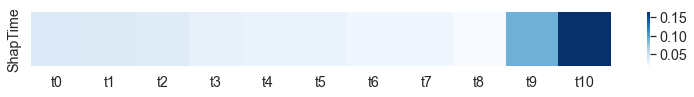

In [30]:
TimeHeatmap(Tn, trans(ShapTime_lstm), time_columns)

In [31]:
for k in range(Tn):
    exec(f't{k} = supertime_add(Tn, train)[k]')

In [32]:
check_replist = [t0, t1, t2, t3, t4, t5, t6, t7, t10, t9, t10]

In [33]:
#check
check = pd.concat(check_replist, axis = 0)
x_check = check.drop(columns = {'Date','Close'}, axis = 1)
y_check = check.loc[:, ['Close']]
x_check_sca = x_check.values[:].reshape(x_check.shape[0], 1, x_check.shape[1])


model_check = tf.keras.Sequential([
        LSTM(100, return_sequences=True,activation='relu'), 
        Dropout(0.1), 
        LSTM(100,return_sequences=False),
        Dropout(0.2), 
        Dense(1) ])

model_check.compile(loss='mse', optimizer='adam') 
    
history = model_check.fit(x_check_sca, y_check, batch_size=64, epochs=100)

Epoch 1/100
48/48 [==============================] - 3s 8ms/step - loss: 0.0469
Epoch 2/100
48/48 [==============================] - 0s 7ms/step - loss: 0.0021
Epoch 3/100
48/48 [==============================] - 0s 8ms/step - loss: 0.0017
Epoch 4/100
48/48 [==============================] - 0s 8ms/step - loss: 0.0014
Epoch 5/100
48/48 [==============================] - 0s 8ms/step - loss: 0.0013
Epoch 6/100
48/48 [==============================] - 0s 8ms/step - loss: 0.0013
Epoch 7/100
48/48 [==============================] - 0s 8ms/step - loss: 0.0013
Epoch 8/100
48/48 [==============================] - 0s 8ms/step - loss: 0.0013
Epoch 9/100
48/48 [==============================] - 0s 8ms/step - loss: 0.0014
Epoch 10/100
48/48 [==============================] - 0s 8ms/step - loss: 0.0013
Epoch 11/100
48/48 [==============================] - 0s 8ms/step - loss: 0.0012
Epoch 12/100
48/48 [==============================] - 0s 8ms/step - loss: 0.0012
Epoch 13/100
48/48 [=================

In [34]:
pred_check = model_check.predict(x_test_sca)
r2_check = r2_score(pred_check, y_test)
mse_check = mean_squared_error(pred_check, y_test)

print(r2_check, 'Degree of Improvement: {:.2%}'.format((r2_check-r2)/abs(r2)))
print(mse_check, 'Degree of Improvement: {:.2%}'.format((mse-mse_check)/mse))

3/3 [==============================] - 0s 2ms/step
0.8812879317752604 Degree of Improvement: 2.63%
0.001655703616959496 Degree of Improvement: 6.29%


In [36]:
model_check.save('model_(lstm).h5')

# GRU

In [37]:
model_gru = tf.keras.Sequential([
        GRU(100, return_sequences=True,activation='relu'), 
        Dropout(0.1), 
        GRU(100,return_sequences=False),
        Dropout(0.2), 
        Dense(1) ])

model_gru.compile(loss='mse', optimizer='adam') 
    
history = model_gru.fit(x_train_sca, y_train, batch_size=64, epochs=100)

Epoch 1/100
48/48 [==============================] - 3s 6ms/step - loss: 0.0187
Epoch 2/100
48/48 [==============================] - 0s 6ms/step - loss: 0.0012
Epoch 3/100
48/48 [==============================] - 0s 6ms/step - loss: 0.0011
Epoch 4/100
48/48 [==============================] - 0s 6ms/step - loss: 0.0011
Epoch 5/100
48/48 [==============================] - 0s 6ms/step - loss: 9.0847e-04
Epoch 6/100
48/48 [==============================] - 0s 6ms/step - loss: 9.7415e-04
Epoch 7/100
48/48 [==============================] - 0s 6ms/step - loss: 9.8721e-04
Epoch 8/100
48/48 [==============================] - 0s 6ms/step - loss: 9.8926e-04
Epoch 9/100
48/48 [==============================] - 0s 6ms/step - loss: 8.8223e-04
Epoch 10/100
48/48 [==============================] - 0s 6ms/step - loss: 7.6321e-04
Epoch 11/100
48/48 [==============================] - 0s 6ms/step - loss: 7.7596e-04
Epoch 12/100
48/48 [==============================] - 0s 7ms/step - loss: 8.2692e-04
Epoch

In [38]:
prediction_gru = model_gru.predict(x_test_sca)

3/3 [==============================] - 0s 2ms/step


In [39]:
r2 = r2_score(prediction_gru, y_test)
mse = mean_squared_error(prediction_gru, y_test)
print(r2)
print(mse)

0.8176195619902289
0.002571378833284569


In [49]:
model_gru.save('model_gru.h5')

In [40]:
Tn= 11
interp_x= x_train_sca
model = model_gru

ShapTime_gru = ShapleyValues(model, interp_x, Tn)

35/35 [==============================] - 0s 1ms/step


35/35 [==============================] - 0s 1ms/step


44/44 [==============================] - 0s 1ms/step


35/35 [==============================] - 0s 1ms/step


70/70 [==============================] - 0s 1ms/step


44/44 [==============================] - 0s 1ms/step


96/96 [==============================] - 0s 1ms/step


In [41]:
time_columns =  ['t0', 't1', 't2', 't3', 't4', 't5', 't6', 't7', 't8', 't9', 't10']

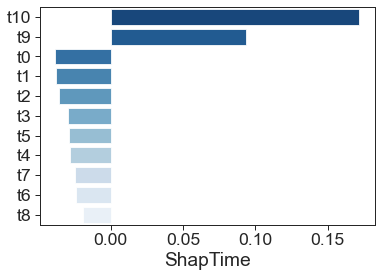

In [42]:
TimeImportance(Tn, trans(ShapTime_gru), time_columns)

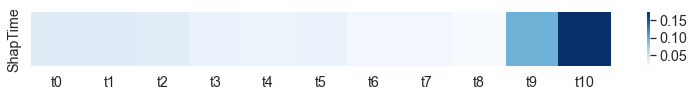

In [43]:
TimeHeatmap(Tn, trans(ShapTime_gru), time_columns)

In [45]:
for k in range(Tn):
    exec(f't{k} = supertime_add(Tn, train)[k]')

In [46]:
check_replist = [t0, t1, t2, t3, t4, t5, t6, t7, t10, t9, t10]

In [47]:
#check
check = pd.concat(check_replist, axis = 0)
x_check = check.drop(columns = {'Date','Close'}, axis = 1)
y_check = check.loc[:, ['Close']]
x_check_sca = x_check.values[:].reshape(x_check.shape[0], 1, x_check.shape[1])


model_check = tf.keras.Sequential([
        GRU(100, return_sequences=True,activation='relu'), 
        Dropout(0.1), 
        GRU(100,return_sequences=False),
        Dropout(0.2), 
        Dense(1) ])

model_check.compile(loss='mse', optimizer='adam') 
    
history = model_check.fit(x_check_sca, y_check, batch_size=64, epochs=100)

Epoch 1/100
48/48 [==============================] - 3s 7ms/step - loss: 0.0215
Epoch 2/100
48/48 [==============================] - 0s 7ms/step - loss: 0.0019
Epoch 3/100
48/48 [==============================] - 0s 7ms/step - loss: 0.0018
Epoch 4/100
48/48 [==============================] - 0s 7ms/step - loss: 0.0015
Epoch 5/100
48/48 [==============================] - 0s 7ms/step - loss: 0.0018
Epoch 6/100
48/48 [==============================] - 0s 8ms/step - loss: 0.0014
Epoch 7/100
48/48 [==============================] - 0s 8ms/step - loss: 0.0016
Epoch 8/100
48/48 [==============================] - 0s 8ms/step - loss: 0.0014
Epoch 9/100
48/48 [==============================] - 0s 8ms/step - loss: 0.0012
Epoch 10/100
48/48 [==============================] - 0s 7ms/step - loss: 0.0012
Epoch 11/100
48/48 [==============================] - 0s 8ms/step - loss: 0.0011
Epoch 12/100
48/48 [==============================] - 0s 8ms/step - loss: 0.0013
Epoch 13/100
48/48 [=================

In [48]:
pred_check = model_check.predict(x_test_sca)
r2_check = r2_score(pred_check, y_test)
mse_check = mean_squared_error(pred_check, y_test)

print(r2_check, 'Degree of Improvement: {:.2%}'.format((r2_check-r2)/abs(r2)))
print(mse_check, 'Degree of Improvement: {:.2%}'.format((mse-mse_check)/mse))

3/3 [==============================] - 0s 2ms/step
0.8498876994623332 Degree of Improvement: 3.95%
0.001991212539043494 Degree of Improvement: 22.56%


In [50]:
model_check.save('model_(gru).h5')

# Bi-RNN

In [51]:
model_birnn = tf.keras.Sequential([
        Bidirectional(SimpleRNN(100, return_sequences=True,activation='relu')), 
        Dropout(0.1),
        Bidirectional(SimpleRNN(100, return_sequences=True,activation='relu')),
        Dropout(0.2),
        Dense(1) ])

model_birnn.compile(loss='mse', optimizer='adam') 
    
history = model_birnn.fit(x_train_sca, y_train, batch_size=64, epochs=100)

Epoch 1/100
48/48 [==============================] - 2s 7ms/step - loss: 0.0154
Epoch 2/100
48/48 [==============================] - 0s 7ms/step - loss: 0.0036
Epoch 3/100
48/48 [==============================] - 0s 7ms/step - loss: 0.0024
Epoch 4/100
48/48 [==============================] - 0s 7ms/step - loss: 0.0019
Epoch 5/100
48/48 [==============================] - 0s 7ms/step - loss: 0.0017
Epoch 6/100
48/48 [==============================] - 0s 7ms/step - loss: 0.0015
Epoch 7/100
48/48 [==============================] - 0s 7ms/step - loss: 0.0012
Epoch 8/100
48/48 [==============================] - 0s 7ms/step - loss: 0.0011
Epoch 9/100
48/48 [==============================] - 0s 7ms/step - loss: 0.0013
Epoch 10/100
48/48 [==============================] - 0s 7ms/step - loss: 0.0011
Epoch 11/100
48/48 [==============================] - 0s 7ms/step - loss: 0.0012
Epoch 12/100
48/48 [==============================] - 0s 7ms/step - loss: 9.9289e-04
Epoch 13/100
48/48 [=============

48/48 [==============================] - 0s 7ms/step - loss: 5.8876e-04
Epoch 99/100
48/48 [==============================] - 0s 6ms/step - loss: 5.4927e-04
Epoch 100/100
48/48 [==============================] - 0s 6ms/step - loss: 5.5058e-04


In [52]:
prediction_bigru = model_birnn.predict(x_test_sca)

3/3 [==============================] - 0s 2ms/step


In [53]:
prediction_bigru = prediction_bigru.reshape(92, 1)

In [54]:
r2 = r2_score(prediction_bigru, y_test)
mse = mean_squared_error(prediction_bigru, y_test)
print(r2)
print(mse)

0.7990067756610788
0.0029614454305278994


In [64]:
model_birnn.save('model_birnn.h5')

In [55]:
Tn= 11
interp_x= x_train_sca
model = model_birnn

ShapTime_birnn = ShapleyValues(model, interp_x, Tn)

44/44 [==============================] - 0s 2ms/step


52/52 [==============================] - 0s 2ms/step


61/61 [==============================] - 0s 2ms/step


61/61 [==============================] - 0s 2ms/step


35/35 [==============================] - 0s 2ms/step


70/70 [==============================] - 0s 3ms/step


96/96 [==============================] - 0s 3ms/step


In [56]:
ShapTime_birnn

[array([[-0.03714314]], dtype=float32),
 array([[-0.03694944]], dtype=float32),
 array([[-0.0349842]], dtype=float32),
 array([[-0.02937974]], dtype=float32),
 array([[-0.02842202]], dtype=float32),
 array([[-0.02895265]], dtype=float32),
 array([[-0.02444444]], dtype=float32),
 array([[-0.02472176]], dtype=float32),
 array([[-0.01984201]], dtype=float32),
 array([[0.09376119]], dtype=float32),
 array([[0.17112023]], dtype=float32)]

In [57]:
time_columns =  ['t0', 't1', 't2', 't3', 't4', 't5', 't6', 't7', 't8', 't9', 't10']

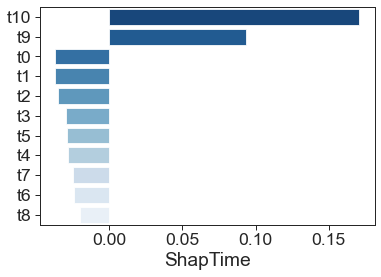

In [58]:
TimeImportance(Tn, trans(ShapTime_birnn), time_columns)

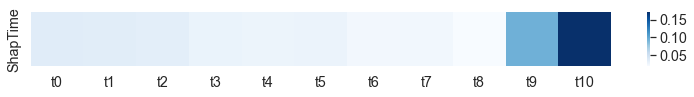

In [59]:
TimeHeatmap(Tn, trans(ShapTime_birnn), time_columns)

In [60]:
for k in range(Tn):
    exec(f't{k} = supertime_add(Tn, train)[k]')

In [61]:
check_replist = [t0, t1, t2, t3, t4, t5, t6, t7, t10, t9, t10]

In [62]:
#check
check = pd.concat(check_replist, axis = 0)
x_check = check.drop(columns = {'Date','Close'}, axis = 1)
y_check = check.loc[:, ['Close']]
x_check_sca = x_check.values[:].reshape(x_check.shape[0], 1, x_check.shape[1])


model_check = tf.keras.Sequential([
        Bidirectional(SimpleRNN(100, return_sequences=True,activation='relu')), 
        Dropout(0.1),
        Bidirectional(SimpleRNN(100, return_sequences=True,activation='relu')),
        Dropout(0.2),
        Dense(1) ])

model_check.compile(loss='mse', optimizer='adam') 
    
history = model_check.fit(x_check_sca, y_check, batch_size=64, epochs=100)

Epoch 1/100
48/48 [==============================] - 2s 9ms/step - loss: 0.0219
Epoch 2/100
48/48 [==============================] - 0s 9ms/step - loss: 0.0050
Epoch 3/100
48/48 [==============================] - 0s 9ms/step - loss: 0.0034
Epoch 4/100
48/48 [==============================] - 0s 9ms/step - loss: 0.0026
Epoch 5/100
48/48 [==============================] - 0s 9ms/step - loss: 0.0021
Epoch 6/100
48/48 [==============================] - 0s 9ms/step - loss: 0.0019
Epoch 7/100
48/48 [==============================] - 0s 9ms/step - loss: 0.0019
Epoch 8/100
48/48 [==============================] - 0s 9ms/step - loss: 0.0017
Epoch 9/100
48/48 [==============================] - 0s 9ms/step - loss: 0.0015
Epoch 10/100
48/48 [==============================] - 0s 9ms/step - loss: 0.0014
Epoch 11/100
48/48 [==============================] - 0s 9ms/step - loss: 0.0013
Epoch 12/100
48/48 [==============================] - 0s 9ms/step - loss: 0.0013
Epoch 13/100
48/48 [=================

In [63]:
pred_check = model_check.predict(x_test_sca)
pred_check = pred_check.reshape(92, 1)
r2_check = r2_score(pred_check, y_test)
mse_check = mean_squared_error(pred_check, y_test)

print(r2_check, 'Degree of Improvement: {:.2%}'.format((r2_check-r2)/abs(r2)))
print(mse_check, 'Degree of Improvement: {:.2%}'.format((mse-mse_check)/mse))

3/3 [==============================] - 0s 3ms/step
0.8932810505140673 Degree of Improvement: 11.80%
0.0016811280140213499 Degree of Improvement: 43.23%


In [65]:
model_check.save('model_(birnn).h5')

# Bi-LSTM

In [8]:
model_bilstm = tf.keras.Sequential([
        Bidirectional(LSTM(100, return_sequences=True,activation='relu')), 
        Dropout(0.1),
        Bidirectional(LSTM(100, return_sequences=True,activation='relu')),
        Dropout(0.2),
        Dense(1) ])

model_bilstm.compile(loss='mse', optimizer='adam') 
    
history = model_bilstm.fit(x_train_sca, y_train, batch_size=64, epochs=100)

Epoch 1/100
48/48 [==============================] - 3s 4ms/step - loss: 0.0290
Epoch 2/100
48/48 [==============================] - 0s 4ms/step - loss: 0.0013
Epoch 3/100
48/48 [==============================] - 0s 4ms/step - loss: 9.4122e-04
Epoch 4/100
48/48 [==============================] - 0s 4ms/step - loss: 8.1634e-04
Epoch 5/100
48/48 [==============================] - 0s 4ms/step - loss: 7.8781e-04
Epoch 6/100
48/48 [==============================] - 0s 4ms/step - loss: 7.3919e-04
Epoch 7/100
48/48 [==============================] - 0s 4ms/step - loss: 6.1811e-04
Epoch 8/100
48/48 [==============================] - 0s 4ms/step - loss: 6.2444e-04
Epoch 9/100
48/48 [==============================] - 0s 4ms/step - loss: 6.2829e-04
Epoch 10/100
48/48 [==============================] - 0s 4ms/step - loss: 7.9934e-04
Epoch 11/100
48/48 [==============================] - 0s 4ms/step - loss: 6.2783e-04
Epoch 12/100
48/48 [==============================] - 0s 4ms/step - loss: 6.0781e-

In [9]:
prediction_bilstm = model_bilstm.predict(x_test_sca)
prediction_bilstm = prediction_bilstm.reshape(92, 1)

3/3 [==============================] - 0s 1ms/step


In [10]:
r2 = r2_score(prediction_bilstm, y_test)
mse = mean_squared_error(prediction_bilstm, y_test)
print(r2)
print(mse)

0.8689036245173619
0.0016434073645026088


In [20]:
model_bilstm.save('model_bilstm.h5')

In [11]:
Tn= 11
interp_x= x_train_sca
model = model_bilstm

ShapTime_bilstm = ShapleyValues(model, interp_x, Tn)

35/35 [==============================] - 0s 897us/step


61/61 [==============================] - 0s 871us/step


44/44 [==============================] - 0s 951us/step


35/35 [==============================] - 0s 1ms/step


35/35 [==============================] - 0s 1ms/step


70/70 [==============================] - 0s 1ms/step


70/70 [==============================] - 0s 1ms/step


96/96 [==============================] - 0s 1ms/step


In [12]:
ShapTime_bilstm

[array([[-0.03644409]], dtype=float32),
 array([[-0.03606321]], dtype=float32),
 array([[-0.03383511]], dtype=float32),
 array([[-0.02800073]], dtype=float32),
 array([[-0.02693216]], dtype=float32),
 array([[-0.02742119]], dtype=float32),
 array([[-0.02266523]], dtype=float32),
 array([[-0.02317452]], dtype=float32),
 array([[-0.01776457]], dtype=float32),
 array([[0.08951934]], dtype=float32),
 array([[0.1628231]], dtype=float32)]

In [13]:
time_columns =  ['t0', 't1', 't2', 't3', 't4', 't5', 't6', 't7', 't8', 't9', 't10']

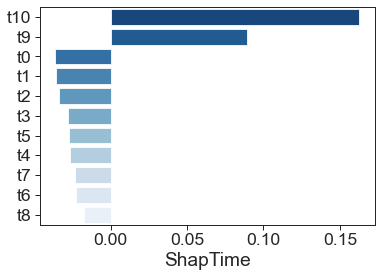

In [14]:
TimeImportance(Tn, trans(ShapTime_bilstm), time_columns)

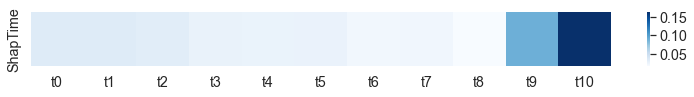

In [15]:
TimeHeatmap(Tn, trans(ShapTime_bilstm), time_columns)

In [16]:
for k in range(Tn):
    exec(f't{k} = supertime_add(Tn, train)[k]')

In [17]:
check_replist = [t0, t1, t2, t3, t4, t5, t6, t7, t10, t9, t10]

In [18]:
#check
check = pd.concat(check_replist, axis = 0)
x_check = check.drop(columns = {'Date','Close'}, axis = 1)
y_check = check.loc[:, ['Close']]
x_check_sca = x_check.values[:].reshape(x_check.shape[0], 1, x_check.shape[1])


model_check = tf.keras.Sequential([
        Bidirectional(LSTM(100, return_sequences=True,activation='relu')), 
        Dropout(0.1),
        Bidirectional(LSTM(100, return_sequences=True,activation='relu')),
        Dropout(0.2),
        Dense(1) ])

model_check.compile(loss='mse', optimizer='adam') 
    
history = model_check.fit(x_check_sca, y_check, batch_size=64, epochs=100)

Epoch 1/100
48/48 [==============================] - 4s 7ms/step - loss: 0.0381
Epoch 2/100
48/48 [==============================] - 0s 7ms/step - loss: 0.0017
Epoch 3/100
48/48 [==============================] - 0s 7ms/step - loss: 0.0014
Epoch 4/100
48/48 [==============================] - 0s 7ms/step - loss: 0.0011
Epoch 5/100
48/48 [==============================] - 0s 7ms/step - loss: 0.0012
Epoch 6/100
48/48 [==============================] - 0s 7ms/step - loss: 0.0010
Epoch 7/100
48/48 [==============================] - 0s 7ms/step - loss: 9.9295e-04
Epoch 8/100
48/48 [==============================] - 0s 7ms/step - loss: 0.0011
Epoch 9/100
48/48 [==============================] - 0s 7ms/step - loss: 0.0010
Epoch 10/100
48/48 [==============================] - 0s 7ms/step - loss: 0.0011
Epoch 11/100
48/48 [==============================] - 0s 7ms/step - loss: 9.3107e-04
Epoch 12/100
48/48 [==============================] - 0s 7ms/step - loss: 0.0010
Epoch 13/100
48/48 [=========

48/48 [==============================] - 0s 7ms/step - loss: 7.2805e-04
Epoch 99/100
48/48 [==============================] - 0s 7ms/step - loss: 6.9268e-04
Epoch 100/100
48/48 [==============================] - 0s 7ms/step - loss: 7.3537e-04


In [19]:
pred_check = model_check.predict(x_test_sca)
pred_check = pred_check.reshape(92, 1)
r2_check = r2_score(pred_check, y_test)
mse_check = mean_squared_error(pred_check, y_test)

print(r2_check, 'Degree of Improvement: {:.2%}'.format((r2_check-r2)/abs(r2)))
print(mse_check, 'Degree of Improvement: {:.2%}'.format((mse-mse_check)/mse))

3/3 [==============================] - 0s 2ms/step
0.9080056670253811 Degree of Improvement: 4.50%
0.0013796648856326092 Degree of Improvement: 16.05%


In [21]:
model_check.save('model_(bilstm).h5')

# Bi-GRU

In [8]:
model_bigru = tf.keras.Sequential([
        Bidirectional(GRU(100, return_sequences=True,activation='relu')), 
        Dropout(0.1),
        Bidirectional(GRU(100, return_sequences=True,activation='relu')),
        Dropout(0.2),
        Dense(1) ])

model_bigru.compile(loss='mse', optimizer='adam') 
    
history = model_bigru.fit(x_train_sca, y_train, batch_size=64, epochs=100)

Epoch 1/100
48/48 [==============================] - 4s 3ms/step - loss: 0.0123
Epoch 2/100
48/48 [==============================] - 0s 4ms/step - loss: 0.0011
Epoch 3/100
48/48 [==============================] - 0s 3ms/step - loss: 9.7956e-04
Epoch 4/100
48/48 [==============================] - 0s 3ms/step - loss: 9.6760e-04
Epoch 5/100
48/48 [==============================] - 0s 3ms/step - loss: 8.2023e-04
Epoch 6/100
48/48 [==============================] - 0s 3ms/step - loss: 8.2841e-04
Epoch 7/100
48/48 [==============================] - 0s 3ms/step - loss: 7.7633e-04
Epoch 8/100
48/48 [==============================] - 0s 3ms/step - loss: 8.0813e-04
Epoch 9/100
48/48 [==============================] - 0s 3ms/step - loss: 7.5133e-04
Epoch 10/100
48/48 [==============================] - 0s 3ms/step - loss: 6.3038e-04
Epoch 11/100
48/48 [==============================] - 0s 3ms/step - loss: 7.1607e-04
Epoch 12/100
48/48 [==============================] - 0s 3ms/step - loss: 8.0973e-

In [9]:
prediction_bigru = model_bigru.predict(x_test_sca)
prediction_bigru = prediction_bigru.reshape(92, 1)

3/3 [==============================] - 0s 1ms/step


In [10]:
r2 = r2_score(prediction_bigru, y_test)
mse = mean_squared_error(prediction_bigru, y_test)
print(r2)
print(mse)

0.7055698126940704
0.004575607229821882


In [20]:
model_bigru.save('model_bigru.h5')

In [11]:
Tn= 11
interp_x= x_train_sca
model = model_bigru

ShapTime_bigru = ShapleyValues(model, interp_x, Tn)

35/35 [==============================] - 0s 880us/step


35/35 [==============================] - 0s 880us/step


78/78 [==============================] - 0s 963us/step


52/52 [==============================] - 0s 1ms/step


70/70 [==============================] - 0s 1ms/step


61/61 [==============================] - 0s 1ms/step


96/96 [==============================] - 0s 2ms/step


In [12]:
ShapTime_bigru

[array([[-0.03915694]], dtype=float32),
 array([[-0.03878983]], dtype=float32),
 array([[-0.03655912]], dtype=float32),
 array([[-0.03032667]], dtype=float32),
 array([[-0.02919839]], dtype=float32),
 array([[-0.02982402]], dtype=float32),
 array([[-0.02464349]], dtype=float32),
 array([[-0.02514127]], dtype=float32),
 array([[-0.01919501]], dtype=float32),
 array([[0.09706819]], dtype=float32),
 array([[0.17581047]], dtype=float32)]

In [13]:
time_columns =  ['t0', 't1', 't2', 't3', 't4', 't5', 't6', 't7', 't8', 't9', 't10']

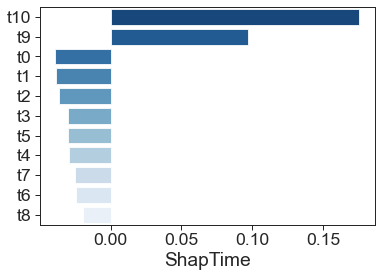

In [14]:
TimeImportance(Tn, trans(ShapTime_bigru), time_columns)

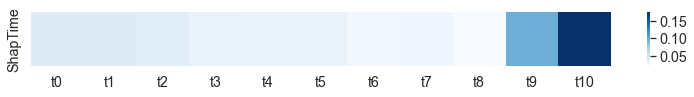

In [15]:
TimeHeatmap(Tn, trans(ShapTime_bigru), time_columns)

In [16]:
for k in range(Tn):
    exec(f't{k} = supertime_add(Tn, train)[k]')

In [17]:
check_replist = [t0, t1, t2, t3, t4, t5, t6, t7, t10, t9, t10]

In [18]:
#check
check = pd.concat(check_replist, axis = 0)
x_check = check.drop(columns = {'Date','Close'}, axis = 1)
y_check = check.loc[:, ['Close']]
x_check_sca = x_check.values[:].reshape(x_check.shape[0], 1, x_check.shape[1])


model_check = tf.keras.Sequential([
        Bidirectional(GRU(100, return_sequences=True,activation='relu')), 
        Dropout(0.1),
        Bidirectional(GRU(100, return_sequences=True,activation='relu')),
        Dropout(0.2),
        Dense(1) ])

model_check.compile(loss='mse', optimizer='adam') 
    
history = model_check.fit(x_check_sca, y_check, batch_size=64, epochs=100)

Epoch 1/100
48/48 [==============================] - 4s 7ms/step - loss: 0.0190
Epoch 2/100
48/48 [==============================] - 0s 7ms/step - loss: 0.0016
Epoch 3/100
48/48 [==============================] - 0s 7ms/step - loss: 0.0015
Epoch 4/100
48/48 [==============================] - 0s 7ms/step - loss: 0.0013
Epoch 5/100
48/48 [==============================] - 0s 7ms/step - loss: 0.0012
Epoch 6/100
48/48 [==============================] - 0s 7ms/step - loss: 0.0012
Epoch 7/100
48/48 [==============================] - 0s 7ms/step - loss: 0.0012
Epoch 8/100
48/48 [==============================] - 0s 7ms/step - loss: 0.0012
Epoch 9/100
48/48 [==============================] - 0s 7ms/step - loss: 0.0012
Epoch 10/100
48/48 [==============================] - 0s 7ms/step - loss: 0.0011
Epoch 11/100
48/48 [==============================] - 0s 7ms/step - loss: 0.0011
Epoch 12/100
48/48 [==============================] - 0s 7ms/step - loss: 0.0011
Epoch 13/100
48/48 [=================

In [19]:
pred_check = model_check.predict(x_test_sca)
pred_check = pred_check.reshape(92, 1)
r2_check = r2_score(pred_check, y_test)
mse_check = mean_squared_error(pred_check, y_test)

print(r2_check, 'Degree of Improvement: {:.2%}'.format((r2_check-r2)/abs(r2)))
print(mse_check, 'Degree of Improvement: {:.2%}'.format((mse-mse_check)/mse))

3/3 [==============================] - 1s 2ms/step
0.8505024871326402 Degree of Improvement: 20.54%
0.0021311048883770065 Degree of Improvement: 53.42%


In [21]:
model_check.save('model_(bigru).h5')